# Test ARC Visualization

Test the visualization utilities with cropping enabled/disabled.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sys
sys.path.insert(0, '..')

from utils.arc_visualization import flat_grid_to_2d, grid_to_image, get_content_bounds, ARC_COLORS

In [2]:
# Load some test data
DATA_PATH = '../data/arc1concept-aug-1000'

inputs = np.load(f'{DATA_PATH}/train/all__inputs.npy', mmap_mode='r')
labels = np.load(f'{DATA_PATH}/train/all__labels.npy', mmap_mode='r')

print(f'inputs shape: {inputs.shape}')
print(f'labels shape: {labels.shape}')

inputs shape: (3633410, 900)
labels shape: (3633410, 900)


In [3]:
def plot_grid(grid_flat, ax, title='', crop=True):
    """Plot a grid using arc_visualization utilities."""
    grid_2d = flat_grid_to_2d(grid_flat, crop=crop)
    img = grid_to_image(grid_2d)
    ax.imshow(img)
    ax.set_title(f'{title}\n{grid_2d.shape}')
    ax.axis('off')

## Compare Cropped vs Full Grid

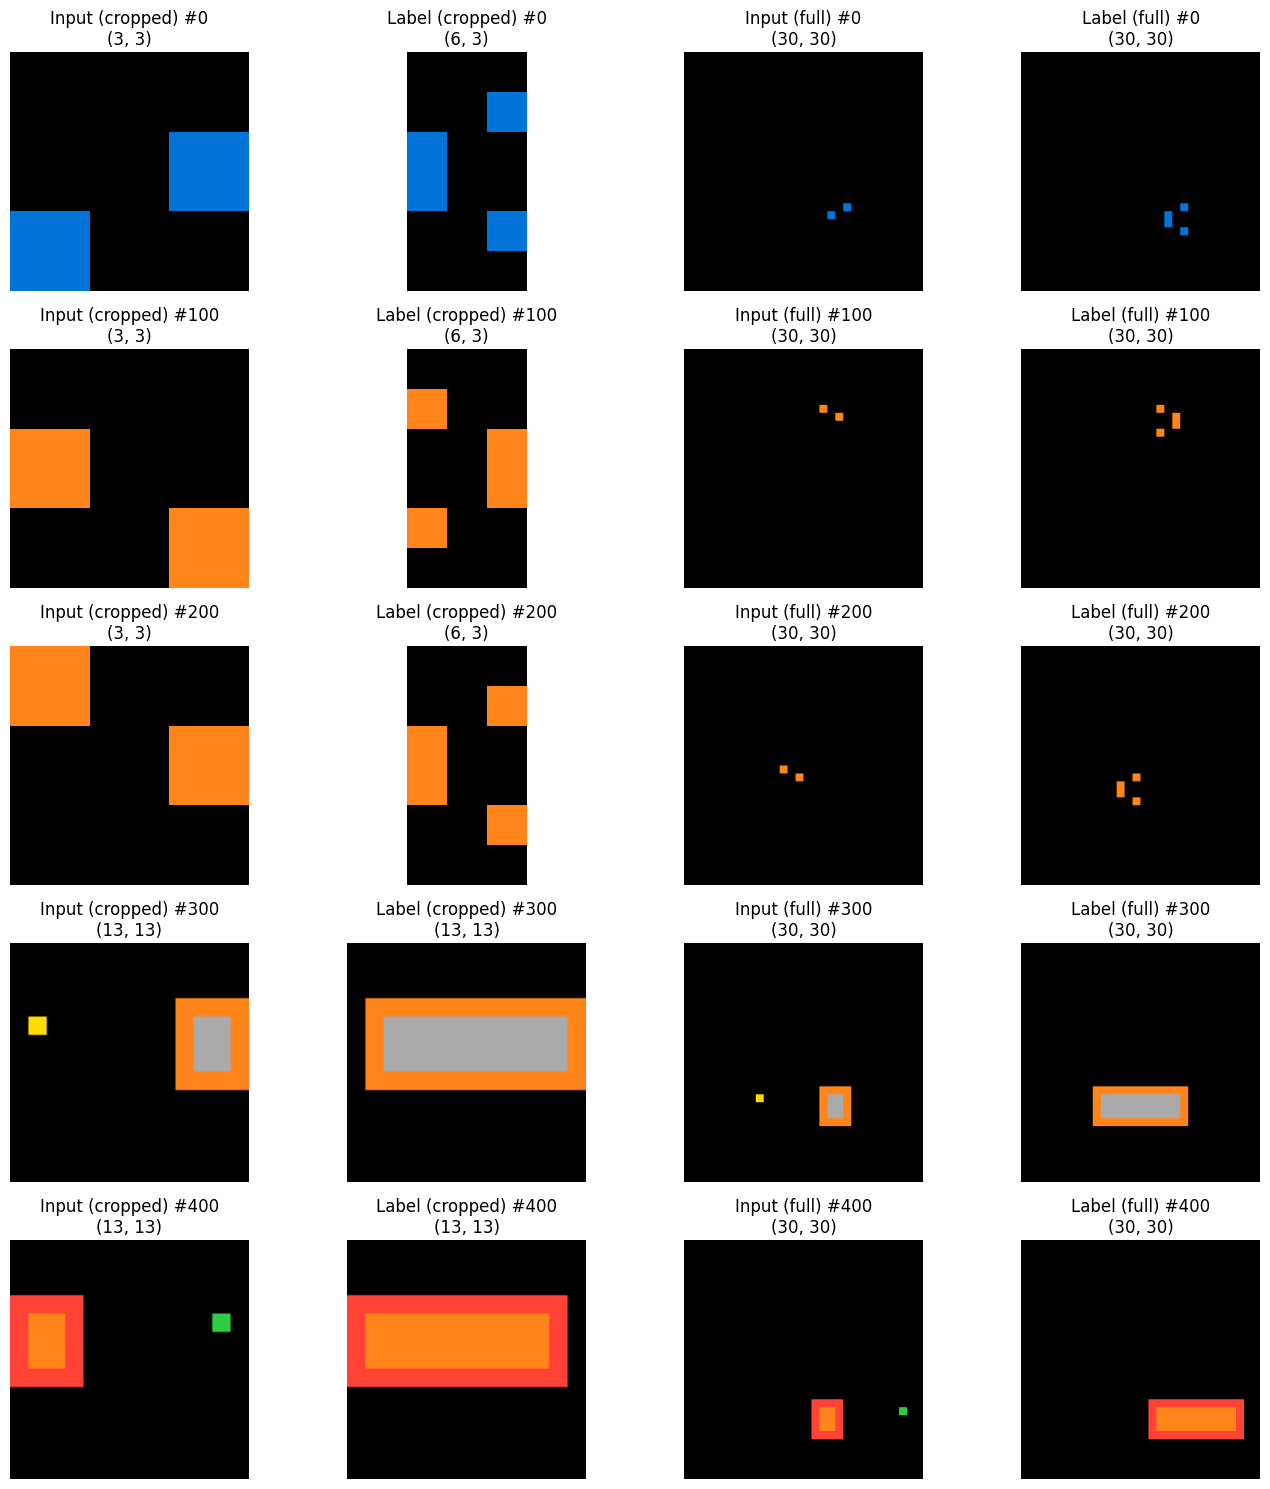

In [4]:
# Compare cropped vs full for several examples
num_examples = 5

fig, axes = plt.subplots(num_examples, 4, figsize=(14, 3 * num_examples))

for i in range(num_examples):
    idx = i * 100  # Sample different puzzles
    
    # Cropped
    plot_grid(inputs[idx], axes[i, 0], f'Input (cropped) #{idx}', crop=True)
    plot_grid(labels[idx], axes[i, 1], f'Label (cropped) #{idx}', crop=True)
    
    # Full 30x30
    plot_grid(inputs[idx], axes[i, 2], f'Input (full) #{idx}', crop=False)
    plot_grid(labels[idx], axes[i, 3], f'Label (full) #{idx}', crop=False)

plt.tight_layout()
plt.show()

## Test with Simulated Training Data

Simulate what happens during training with -100 labels and random predictions.

In [5]:
# Simulate training data
idx = 0

# Input stays the same
test_input = inputs[idx]

# Label: convert to int32, replace PAD with -100
test_label = labels[idx].astype(np.int32)
test_label[test_label == 0] = -100

# For visualization, replace -100 back to 0
label_for_viz = test_label.copy()
label_for_viz[label_for_viz == -100] = 0

# Random predictions (early training)
np.random.seed(42)
random_pred = np.random.randint(0, 12, size=900)

print('Unique values:')
print(f'  Input: {np.unique(test_input)}')
print(f'  Label (after -100 restore): {np.unique(label_for_viz)}')
print(f'  Prediction: {np.unique(random_pred)}')

Unique values:
  Input: [0 1 2 3]
  Label (after -100 restore): [0 1 2 3]
  Prediction: [ 0  1  2  3  4  5  6  7  8  9 10 11]


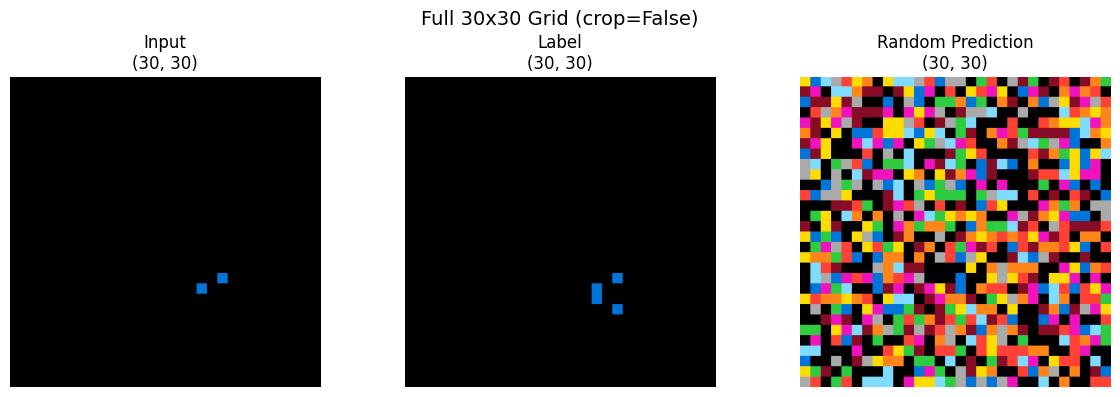

In [6]:
# Visualize with crop=False (full 30x30)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

plot_grid(test_input, axes[0], 'Input', crop=False)
plot_grid(label_for_viz, axes[1], 'Label', crop=False)
plot_grid(random_pred, axes[2], 'Random Prediction', crop=False)

fig.suptitle('Full 30x30 Grid (crop=False)', fontsize=14)
plt.tight_layout()
plt.show()

Label content bounds: (np.int64(18), np.int64(24), np.int64(18), np.int64(21))


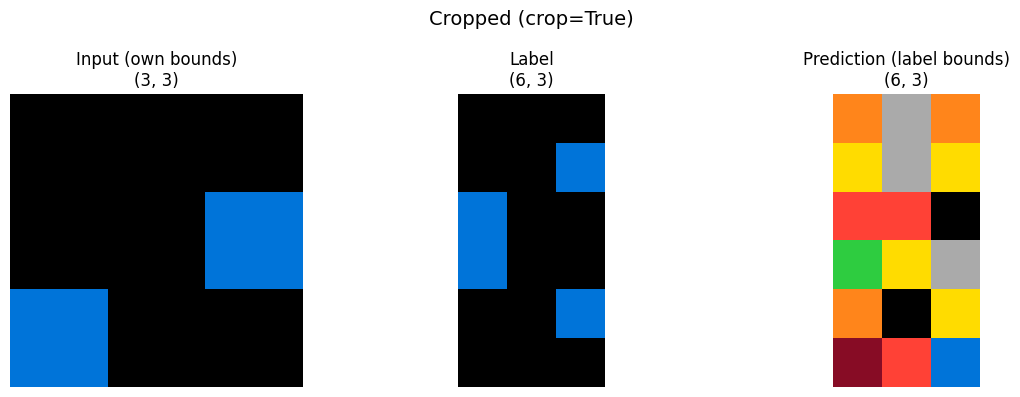

In [7]:
# Visualize with crop=True using label bounds for prediction
label_bounds = get_content_bounds(label_for_viz)
print(f'Label content bounds: {label_bounds}')

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Input uses its own bounds
input_grid = flat_grid_to_2d(test_input, crop=True)
axes[0].imshow(grid_to_image(input_grid))
axes[0].set_title(f'Input (own bounds)\n{input_grid.shape}')
axes[0].axis('off')

# Label uses its bounds
label_grid = flat_grid_to_2d(label_for_viz, bounds=label_bounds, crop=True)
axes[1].imshow(grid_to_image(label_grid))
axes[1].set_title(f'Label\n{label_grid.shape}')
axes[1].axis('off')

# Prediction uses label's bounds
pred_grid = flat_grid_to_2d(random_pred, bounds=label_bounds, crop=True)
axes[2].imshow(grid_to_image(pred_grid))
axes[2].set_title(f'Prediction (label bounds)\n{pred_grid.shape}')
axes[2].axis('off')

fig.suptitle('Cropped (crop=True)', fontsize=14)
plt.tight_layout()
plt.show()

## Color Palette Test

In [ ]:
# Display all 10 colors
test_colors = np.arange(10).reshape(1, 10)
color_img = grid_to_image(test_colors.astype(np.int32), cell_size=30)

fig, ax = plt.subplots(figsize=(12, 2))
ax.imshow(color_img)
ax.set_title('ARC Color Palette (0-9)')
ax.set_xticks(np.arange(10) * 30 + 15)
ax.set_xticklabels(range(10))
ax.set_yticks([])
plt.show()

# Print RGB values
print('RGB values:')
for i, c in enumerate(ARC_COLORS):
    print(f'  {i}: {c}')